In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.drop(['ID'], axis=1, inplace=True)

In [4]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 29.0+ MB


In [6]:
df.describe()

,Age,Height,Weight,Year
count,261642.000000,210945.000000,208241.000000,271116.000000
mean,25.556898,175.338970,70.702393,1978.378480
std,6.393561,10.518462,14.348020,29.877632
min,10.000000,127.000000,25.000000,1896.000000
25%,21.000000,168.000000,60.000000,1960.000000
50%,24.000000,175.000000,70.000000,1988.000000
75%,28.000000,183.000000,79.000000,2002.000000
max,97.000000,226.000000,214.000000,2016.000000


In [7]:
df.sample(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
33149,Bror Erik Bylhn,M,26.0,172.0,61.0,Sweden,SWE,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 800 metres,NaN
137752,"L. F. ""Laddie"" Lewis",M,NaN,NaN,NaN,Guyana,GUY,1948 Summer,1948,Summer,London,Cycling,"Cycling Men's 1,000 metres Time Trial",NaN
89514,Graeme Monroe Hammond,M,54.0,NaN,NaN,United States,USA,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's epee, Individual",NaN
124122,Ronald Koppelent,M,20.0,NaN,NaN,Austria,AUT,1976 Winter,1976,Winter,Innsbruck,Figure Skating,Figure Skating Men's Singles,NaN
10060,George Aschenbrener,M,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Gymnastics,Gymnastics Men's Individual All-Around,NaN


In [8]:
df.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

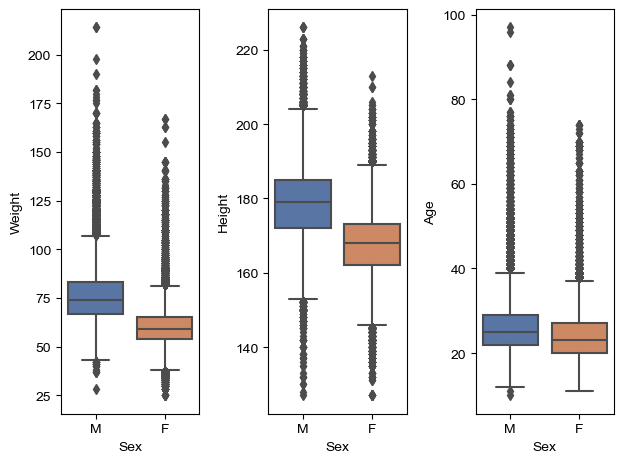

In [9]:
fig, axes = plt.subplots(1, 3)

sns.set()

sns.boxplot(data=df, x='Sex', y='Weight', ax=axes[0])
sns.boxplot(data=df, x='Sex', y='Height', ax=axes[1])
sns.boxplot(data=df, x='Sex', y='Age', ax=axes[2])

fig.tight_layout() 

<AxesSubplot:>

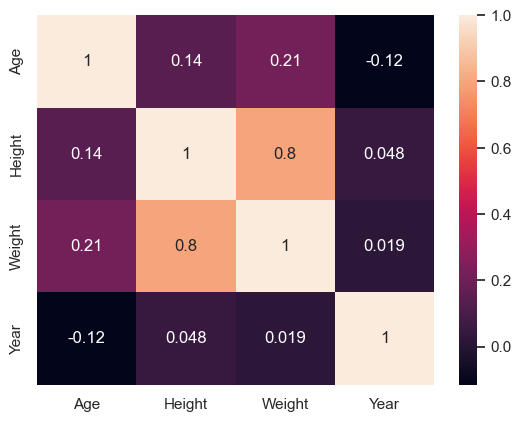

In [10]:
sns.heatmap(df.drop(['Name'], axis=1).corr(), annot=True)

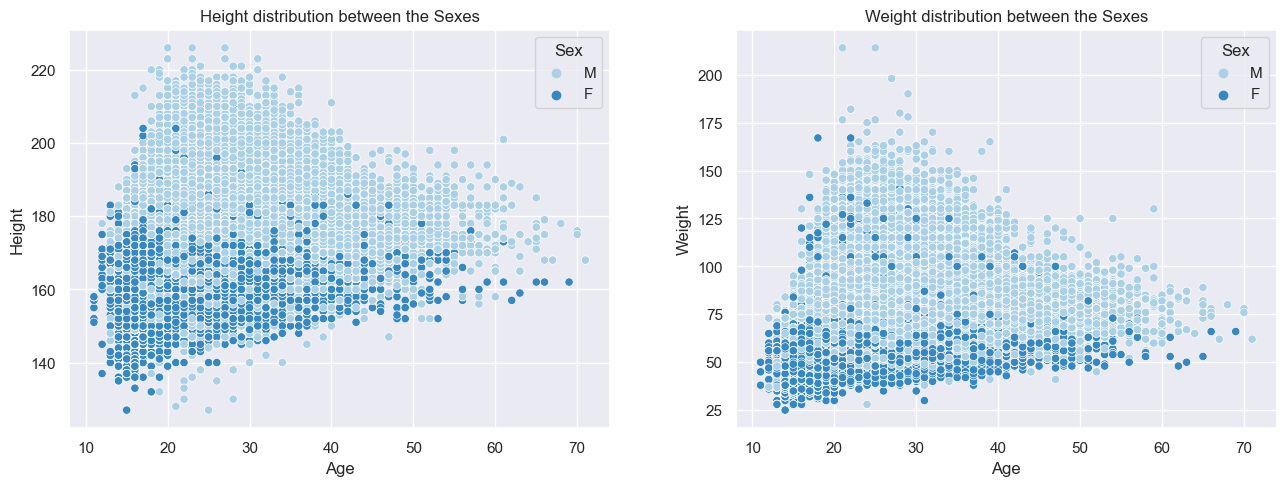

In [11]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(14)
fig.set_figheight(6)

sns.scatterplot(x='Age', y='Height', hue='Sex', data=df, palette='Blues', ax=axes[0]).set(title='Height distribution between the Sexes')
sns.scatterplot(x='Age', y='Weight', hue='Sex', data=df, palette='Blues', ax=axes[1]).set(title='Weight distribution between the Sexes')

fig.tight_layout(pad=4) 

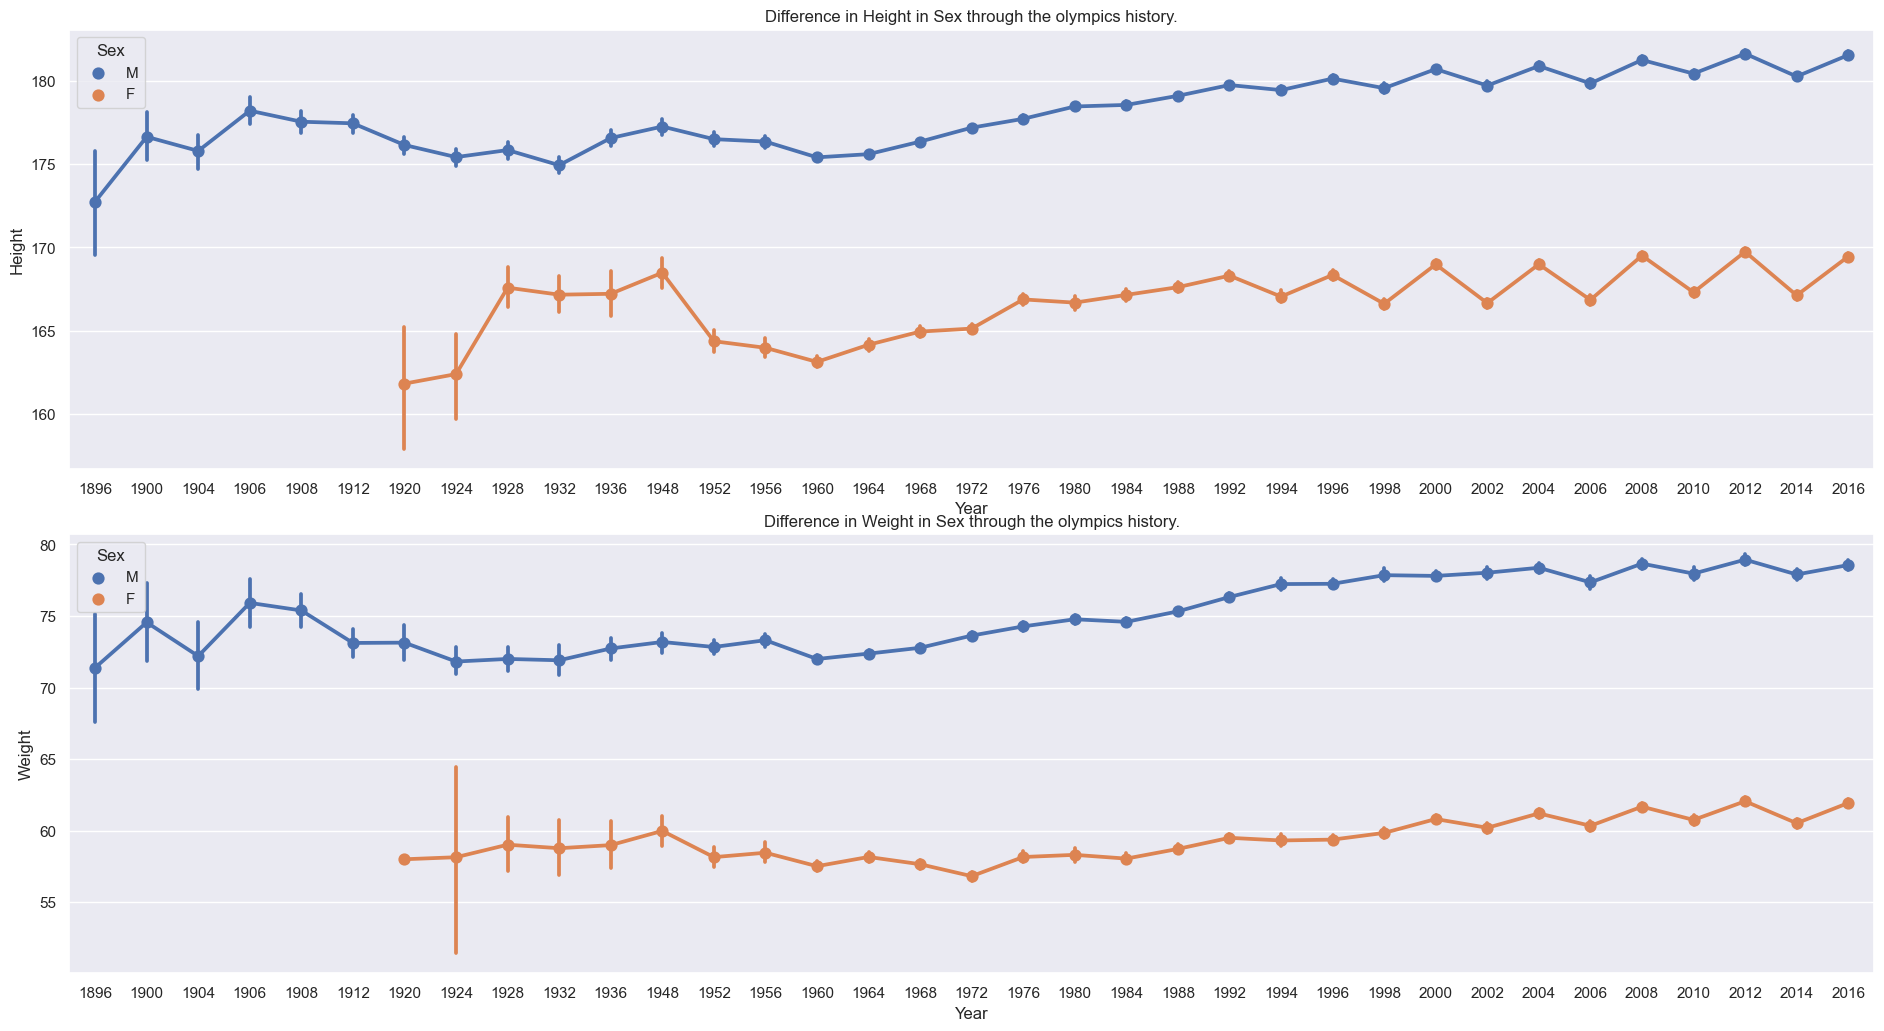

In [12]:
plt.figure(figsize=(19,10))

plt.subplot(211)
ax = sns.pointplot(x='Year', y='Height', hue='Sex', data=df).set(title='Difference in Height in Sex through the olympics history.')

plt.tight_layout()

plt.subplot(212)
ax = sns.pointplot(x='Year', y='Weight', hue='Sex', data=df).set(title='Difference in Weight in Sex through the olympics history.')

In [13]:
medals = df[(df['Medal'] == 'Bronze') | (df['Medal'] == 'Silver') | (df['Medal'] == 'Gold')]

In [14]:
medals.isnull().sum()

Name         0
Sex          0
Age        732
Height    8711
Weight    9327
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

In [15]:
medals = medals[medals['Age'].notna()]
medals['Age'] = medals['Age'].astype('int')

[Text(0.5, 1.0, 'Medals distribution depending on Age')]

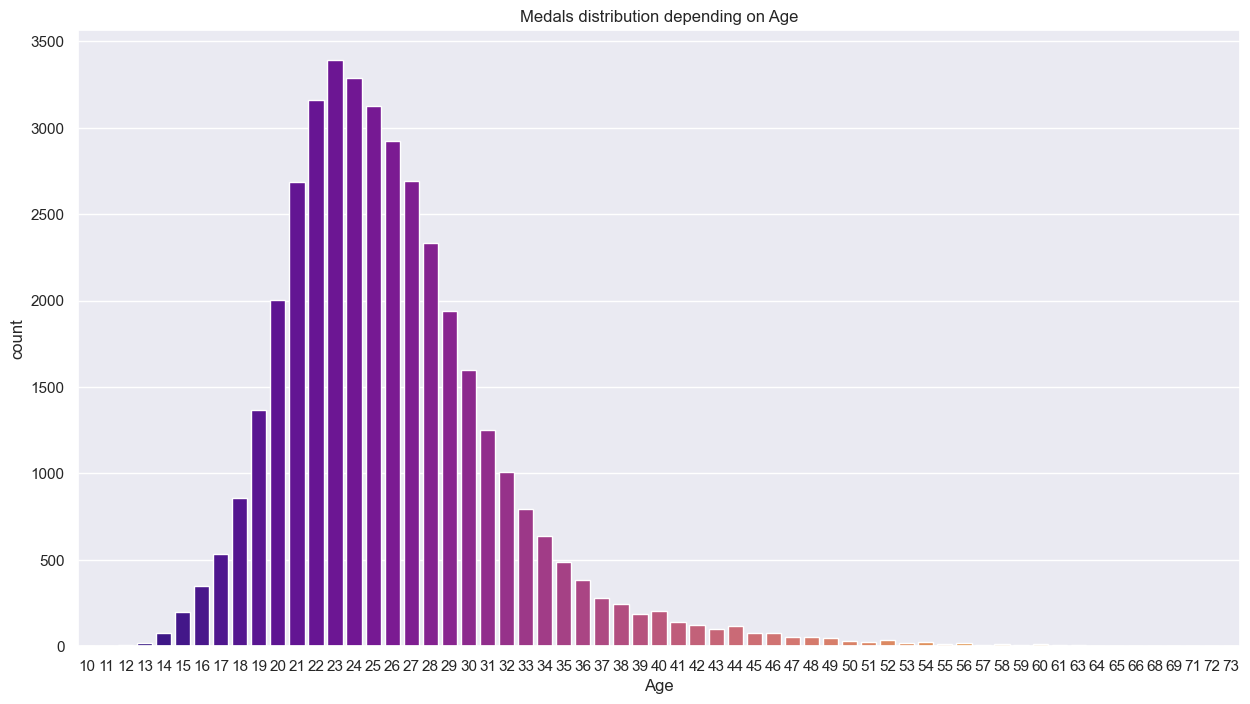

In [16]:
plt.figure(figsize=(15, 8))
plt.tight_layout()

sns.countplot(medals['Age'], palette='plasma').set(title='Medals distribution depending on Age')

[Text(0.5, 1.0, 'Medals distribution between Males and Females')]

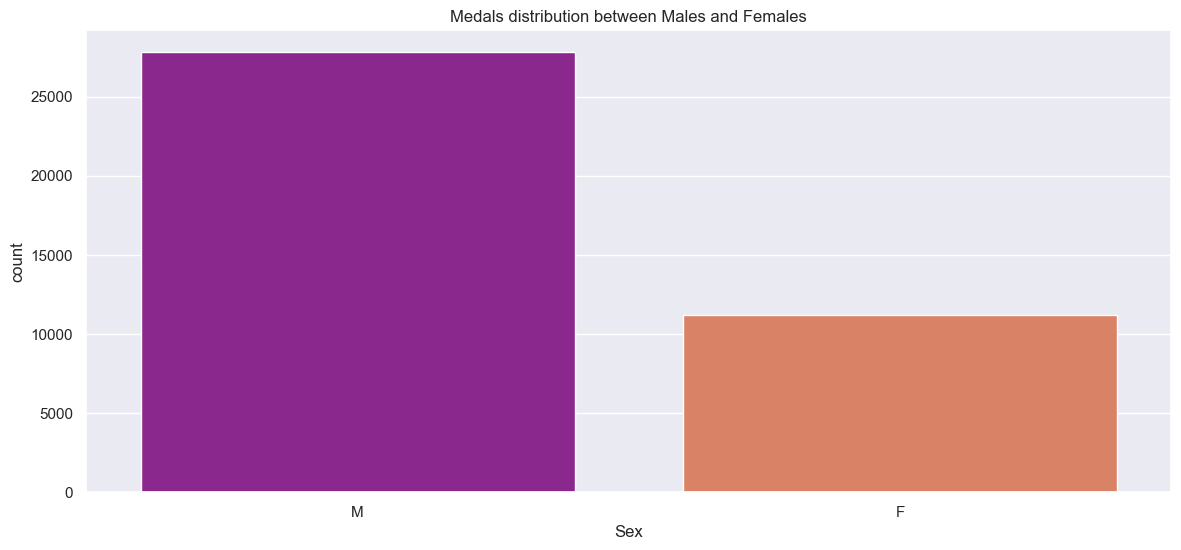

In [17]:
plt.figure(figsize=(14, 6))
plt.tight_layout()

sns.countplot(medals['Sex'], palette='plasma').set(title='Medals distribution between Males and Females')

Text(0.5, 1.0, 'Distribution of Medals won by Poland')

<Figure size 3000x800 with 0 Axes>

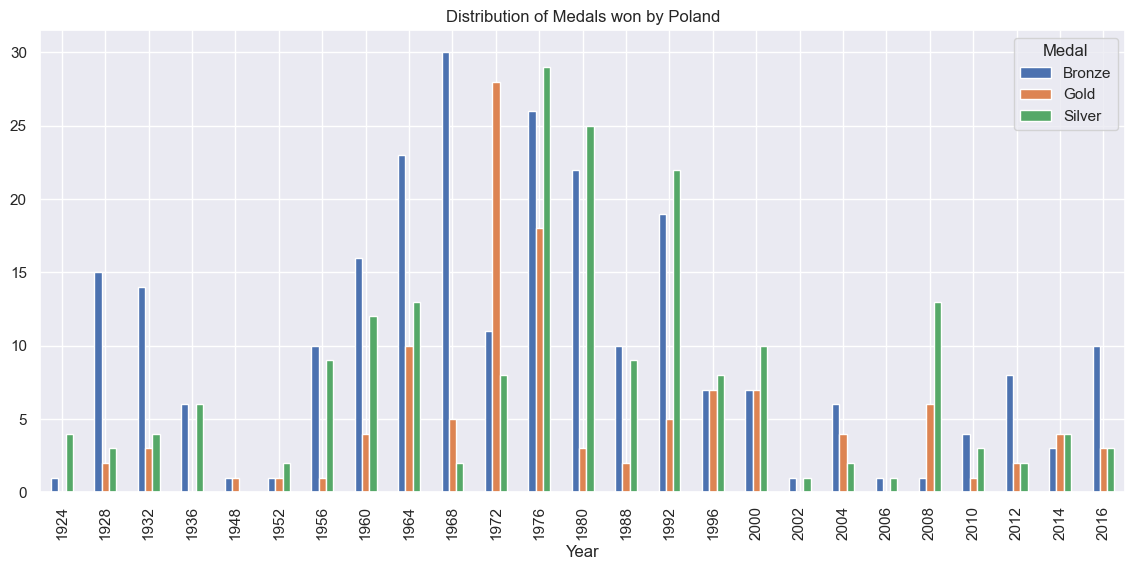

In [18]:
pol=df[df['NOC']=='POL']

plt.figure(figsize=(30, 8))
POL_medals=pd.crosstab(pol['Year'], pol['Medal'])
pol_plot=POL_medals.plot.bar(figsize=(14, 6))
plt.title('Distribution of Medals won by Poland')

# Feature engineering

In [19]:
df['Weight'] = round(df['Weight'].fillna(df.groupby(['Team'])['Weight'].transform('mean')), 2)
df['Weight'] = round(df['Weight'].fillna(df.groupby(['Age'])['Weight'].transform('mean')), 2)
df['Weight'] = round(df['Weight'].fillna(df.groupby(['Sex'])['Weight'].transform('mean')), 2)

df['Height'] = round(df['Height'].fillna(df.groupby(['Team'])['Height'].transform('mean')), 2)
df['Height'] = round(df['Height'].fillna(df.groupby(['Age'])['Height'].transform('mean')), 2)
df['Height'] = round(df['Height'].fillna(df.groupby(['Sex'])['Height'].transform('mean')), 2)

df = df[df['Age'].notna()]

In [20]:
df.isnull().sum()

Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     222591
dtype: int64

In [21]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,179.22,73.89,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,176.49,73.40,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [22]:
filter1 = df["Year"] >= 1900
filter2 = df["Year"] <= 1999

df.where(filter1 & filter2, inplace=True)
df = df[df['Sport'] == "Athletics"]

df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00,73.51,Netherlands,NED,1932 Summer,1932.0,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.00,73.51,Netherlands,NED,1932 Summer,1932.0,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
94,Evald rma (rman-),M,24.0,174.00,70.00,Estonia,EST,1936 Summer,1936.0,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN
95,Olav Augunson Aarnes,M,23.0,177.95,72.77,Norway,NOR,1912 Summer,1912.0,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
130,Erling Rudolf Aastad,M,22.0,177.00,74.00,Norway,NOR,1920 Summer,1920.0,Summer,Antwerpen,Athletics,Athletics Men's 4 x 100 metres Relay,NaN


In [23]:
df.reset_index(inplace=True)
df = df[['Sex', 'Age', 'Height', 'Weight', 'Year',  'Medal']]

df.head()

,Sex,Age,Height,Weight,Year,Medal
0,F,18.0,168.00,73.51,1932.0,NaN
1,F,18.0,168.00,73.51,1932.0,NaN
2,M,24.0,174.00,70.00,1936.0,NaN
3,M,23.0,177.95,72.77,1912.0,NaN
4,M,22.0,177.00,74.00,1920.0,NaN


In [24]:
df.isnull().sum()

Sex           0
Age           0
Height        0
Weight        0
Year          0
Medal     22788
dtype: int64

In [25]:
df['Medal'] = [1 if i == 'Bronze' or i == 'Silver' or i == 'Gold' else 0 for i in df['Medal']]
df['Sex'] = [1 if i == 'M' else 0 for i in df['Sex']]

In [26]:
df['Medal'].unique()

array([0, 1], dtype=int64)

In [27]:
df.head()

,Sex,Age,Height,Weight,Year,Medal
0,0,18.0,168.00,73.51,1932.0,0
1,0,18.0,168.00,73.51,1932.0,0
2,1,24.0,174.00,70.00,1936.0,0
3,1,23.0,177.95,72.77,1912.0,0
4,1,22.0,177.00,74.00,1920.0,0


In [28]:
df.describe()

,Sex,Age,Height,Weight,Year,Medal
count,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000
mean,0.758704,24.701805,176.288688,69.659014,1962.099204,0.115544
std,0.427878,4.215133,8.088995,12.881402,27.520560,0.319684
min,0.000000,12.000000,147.000000,35.000000,1900.000000,0.000000
25%,1.000000,22.000000,171.000000,62.000000,1948.000000,0.000000
50%,1.000000,24.000000,176.000000,70.000000,1968.000000,0.000000
75%,1.000000,27.000000,181.000000,74.000000,1988.000000,0.000000
max,1.000000,52.000000,208.000000,150.000000,1996.000000,1.000000


In [29]:
df['Age'] = df['Age'] / 52
df['Height'] = df['Height'] / 208
df['Weight'] = df['Weight'] / 150
df['Year'] = df['Year'] / 1996

In [30]:
df.describe()

,Sex,Age,Height,Weight,Year,Medal
count,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000,25765.000000
mean,0.758704,0.475035,0.847542,0.464393,0.983016,0.115544
std,0.427878,0.081060,0.038889,0.085876,0.013788,0.319684
min,0.000000,0.230769,0.706731,0.233333,0.951904,0.000000
25%,1.000000,0.423077,0.822115,0.413333,0.975952,0.000000
50%,1.000000,0.461538,0.846154,0.466667,0.985972,0.000000
75%,1.000000,0.519231,0.870192,0.493333,0.995992,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.loc[:, ['Age', 'Height', 'Weight', 'Year']].values
y = df.loc[:, ['Sex']].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(20612, 4)

In [35]:
X_train[2]

array([0.46153846, 0.85480769, 0.48393333, 0.96192385])

In [36]:
y_test[2]

array([1], dtype=int64)

In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = [{'max_depth': list(range(10, 30)), 'max_features': list(range(0,20)),}]

In [39]:
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose = 10, n_jobs=3) 

In [40]:
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=3,
             param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                        20, 21, 22, 23, 24, 25, 26, 27, 28,
                                        29],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19]}],
             verbose=10)

In [41]:
grid_predictions = grid.predict(X_test) 

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1257
           1       0.91      0.93      0.92      3896

    accuracy                           0.88      5153
   macro avg       0.84      0.83      0.83      5153
weighted avg       0.88      0.88      0.88      5153

